# Tennis

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import torch
from agent import Agent

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64", worker_id=44)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [4]:
def maddpg(n_episodes=10000, max_t=1000, train_mode=True):
    all_scores = []
    scores_window = deque(maxlen=100)

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         
        states = np.reshape(env_info.vector_observations, (1,48)) 
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)

        while True:
            actions = get_actions(states, add_noise=True)
            env_info = env.step(actions)[brain_name]
            next_states = np.reshape(env_info.vector_observations, (1, 48))
            rewards = env_info.rewards
            done = env_info.local_done
            agent_0.step(states, actions, rewards[0], next_states, done, 0)
            agent_1.step(states, actions, rewards[1], next_states, done, 1)
            scores += np.max(rewards)                         
            states = next_states

            if np.any(done):
                # we're done when the ball hit the ground or goes out of bounds
                scores_window.append(np.mean(scores))
                all_scores.append(np.mean(scores))
                break

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))

        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)), flush=True)
            # Save only the actor because that's all we need to run at test (visualization) time
            torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
            torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
            break
            
    return all_scores

def get_actions(states, add_noise=False):
    action_0 = agent_0.act(states, add_noise)
    action_1 = agent_1.act(states, add_noise)

    return np.stack((action_0, action_1), axis=0).flatten()

Train the agent:

In [5]:
agent_0 = Agent(state_size, action_size)
agent_1 = Agent(state_size, action_size)

scores = maddpg()

/home/josh/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:995: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 300	Average Score: 0.01
Episode 400	Average Score: 0.01
Episode 500	Average Score: 0.01
Episode 600	Average Score: 0.01
Episode 700	Average Score: 0.02
Episode 800	Average Score: 0.02
Episode 900	Average Score: 0.02
Episode 1000	Average Score: 0.03
Episode 1100	Average Score: 0.02
Episode 1200	Average Score: 0.03
Episode 1300	Average Score: 0.03
Episode 1400	Average Score: 0.02
Episode 1500	Average Score: 0.02
Episode 1600	Average Score: 0.04
Episode 1700	Average Score: 0.11
Episode 1800	Average Score: 0.21
Episode 1900	Average Score: 0.19
Episode 2000	Average Score: 0.21
Episode 2100	Average Score: 0.25
Episode 2200	Average Score: 0.19
Episode 2300	Average Score: 0.08
Episode 2400	Average Score: 0.05
Episode 2500	Average Score: 0.08
Episode 2600	Average Score: 0.14
Episode 2700	Average Score: 0.14
Episode 2800	Average Score: 0.28
Episode 2900	Average Score: 0.33
Episode 3000	Average Score: 0.23
Episode 3100	Averag

Plot the results

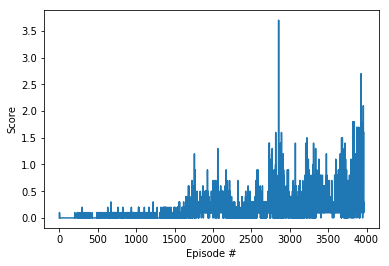

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()